In [4]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.endpoint import EndModel
from aeons.toy_samples import correlated_gaussian
from aeons.plotting import plot_split, plot_std

In [2]:
samples = pickle_in(f"{aeons_dir}/samples/toy/planck.pickle")
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

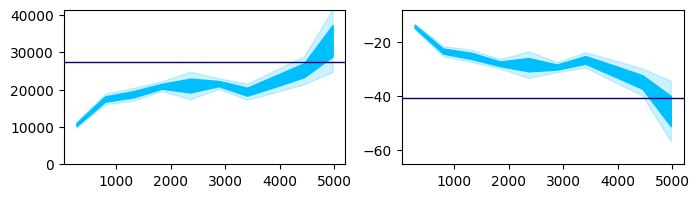

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian/bandwidth_trunc_start.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=1.5, ax=axs[0])
plot_std(iterations, logXfs, logXfs_std, true_logXf, ylim=(true_logXf*1.6, true_logXf*0.2), ax=axs[1])

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


-8.048136249668618

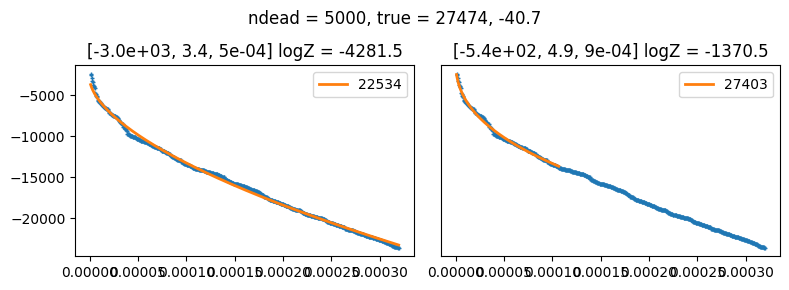

In [8]:
ndead = 5000
plot_split(model, ndead, splits=3)
samples.logX().iloc[ndead]

In [7]:
samples = correlated_gaussian(nlive=500, mean=[0, 0], cov=np.diag([0.1, 0.2]))

In [14]:
X = np.exp(samples.logX())
logL = samples.logL
logL

      weights 
0     0.002000   -6.924092
1     0.002069   -6.890205
2     0.002541   -6.684433
3     0.002699   -6.624117
4     0.002807   -6.585019
                    ...   
1508  0.991166   -0.012095
1509  0.994090   -0.009148
1510  0.997630   -0.005593
1511  0.999353   -0.003868
1512  1.000000   -0.003221
Name: logL, Length: 1513, dtype: float64

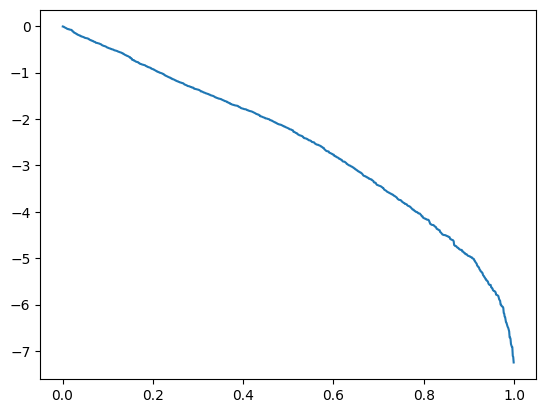

In [21]:
ndead = 0
plt.plot(X[ndead:], logL[ndead:])